### How to begin writing Python

Download Python. Highly recommend https://docs.anaconda.com/miniconda/ (rather than Anaconda or python.org), it's like 1/10th the space and you can just install packages as needed.

##### Where to write Python?

Two major options:
1. Notebooks. This workshop is making extensive use of Jupyter notebooks. They are easy to set up and straightforward to work with:

In [94]:
a = 3

In [95]:
print(a)
#wow

3


For more useful features of notebooks see lecture 3!

I would not recommend notebooks for anything beyond the "exploration" phase of a project. Why not?
-variables are kept in memory:

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def forward_one_gen(p, s):
    return p + s * p * (1 - p)

N = 10000
s = 0.01
num_gens = 500
p_init = .25
allele_freqs = np.zeros(num_gens)

In [102]:
allele_freqs[0] = p_init
for i in np.arange(1,num_gens):
    allele_freqs[i] = forward_one_gen(allele_freqs[i-1], s)

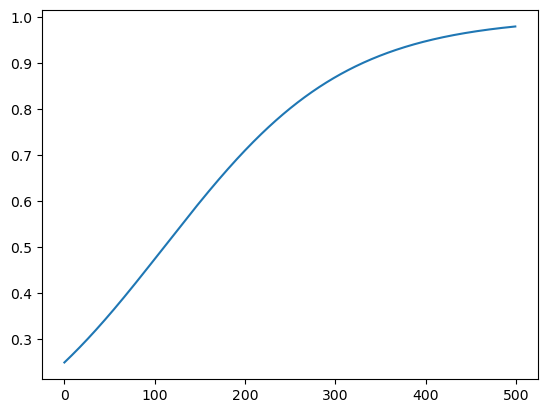

In [103]:
plt.plot(allele_freqs)
plt.show()

uh oh!
this also highlights another problem with notebooks - how would I figure out what was wrong here? Print out the value of every variable? Seems extremely difficult if I have thousands of lines of code across multiple files...

that said, my PI (CS major in college) does 90% of his coding in notebooks so it's certainly doable.

2. some sort of actual editor.
-I use pycharm for a few reasons:

- variable viewer (viewing numpy arrays well!!!) + inline plots can be useful + notebook like ability to run code after your code has completed
debugger good, we'll talk more about how to make your code run in the defensive programming lecture but sometimes print statements aren't good enough. very useful to be able to step through individual lines of code.
- refactoring/renaming across a project is quite nice - I had  to rename basically everything from "add" to "additive" before I can publish my paper, I can do that. Even just finding within a project has been very useful - you copy code from one file to another, forget what the inputs to the code are exactly, just search it. Demonstrate the Alt + J shortcut thing b/c it's nice.
- plenty of alternatives exist - VSCode, emacs/vim if you actually know how to use computers, Spyder, etc.

### Advanced Introductory Python


#### Important data types and what to do with them

##### strings! they're a tuple of characters

In [104]:
test_str = "mutable?"
print(test_str[-1])

?


In [105]:
test_str[-1] = "!"

TypeError: 'str' object does not support item assignment

they support a variety of fun methods

In [106]:
tall_test_str = test_str.upper()
print(tall_test_str)
split_str = test_str.split("u")
for split_part in split_str:
    print(split_part)

MUTABLE?
m
table?


what *should* you know about strings? how to format them!

In [107]:
freqs[0] = p_init
for i in np.arange(1,num_gens):
    freqs[i] = forward_one_gen(freqs[i-1], s)
    if not i%100:
        print(f"frequency at gen. {i} is {freqs[i]}. In a population of size {N}, {freqs[i]*N:.0f} will have the allele.")

frequency at gen. 100 is 0.4750105595980145. In a population of size 10000, 4750 will have the allele.
frequency at gen. 200 is 0.7111395384968464. In a population of size 10000, 7111 will have the allele.
frequency at gen. 300 is 0.8703345726168399. In a population of size 10000, 8703 will have the allele.
frequency at gen. 400 is 0.9482448194196231. In a population of size 10000, 9482 will have the allele.


##### lists and tuples

In [108]:
shopping_list_fruits = ["apples", "pears", "papayas"]
print(f"first item: {shopping_list_fruits[0]}")
print(f"ending slice: {shopping_list_fruits[-2:]}")

first item: apples
ending slice: ['pears', 'papayas']


Unlike strings, lists are mutable - you can modify list elements, add items, etc.

In [109]:
print(shopping_list_fruits)
shopping_list_fruits.append("durians")
print(shopping_list_fruits)

#hmm maybe not durians...
shopping_list_fruits[-1] = "peaches"
print(shopping_list_fruits)

['apples', 'pears', 'papayas']
['apples', 'pears', 'papayas', 'durians']
['apples', 'pears', 'papayas', 'peaches']


tuples are immutable lists. That's it.

In [110]:
shopping_tuple_fruits = ("apples", "pears", "papayas")
print(shopping_tuple_fruits[0])

apples


In [111]:
shopping_tuple_fruits[-1] = "durians"

TypeError: 'tuple' object does not support item assignment

They are most frequently seen in the context of variable unpacking:

In [113]:
# example a

created_range_explicit = range(0,10)

mytuple = (0,10)
#uncreated_range_tuple = range(mytuple) #no
created_range_tuple = range(*mytuple) #yes!

mylist = [0,10]
created_range_list = range(*mylist) #also yes


print(created_range_list)
print(created_range_tuple)

range(0, 10)
range(0, 10)


In [114]:
#example b

import numpy as np
a = np.zeros((10,5)) # tuple!

print(a.shape)

length, width = a.shape

print(length)
print(width)

(10, 5)
10
5


##### control flow: no longer covering the walrus operator

if statements do exactly what you think:

In [117]:
a = .009008

if a > 9000:
    print("a is over nine THOUSAAAAAAAAAAAAAAAAAND")
elif (a > 0) and (a < .01):
    print("a is very demure. very mindful.")
else:
    print("a is uninteresting")

a is very demure. very mindful.


for loops are extremely useful because they don't just take a variable. also list comprehensions are cool and useful to replace short loops.

In [118]:
print(shopping_list_fruits)

['apples', 'pears', 'papayas', 'peaches']


In [119]:
#bad python
fruit_beginnings_range = []
for i in range(len(shopping_list_fruits)):
    fruit_i = shopping_list_fruits[i]
    fruit_beginnings_range.append(fruit_i[:2])
print(fruit_beginnings_range)

['ap', 'pe', 'pa', 'pe']


In [120]:
#good python
fruit_beginnings_for = []
for fruit in shopping_list_fruits:
    fruit_beginnings_for.append(fruit[:2])
print(fruit_beginnings_for)

['ap', 'pe', 'pa', 'pe']


In [121]:
#best python
fruit_beginnings_listcomp = [fruit[:2] for fruit in shopping_list_fruits]
print(fruit_beginnings_listcomp)

['ap', 'pe', 'pa', 'pe']


##### additional control flow tools - continue, break

what if we don't want duplicates? option 1:

In [122]:
#also bad python
fruit_beginnings_range = []
for i in range(len(shopping_list_fruits)):
    if shopping_list_fruits[i][:2] in fruit_beginnings_range:
        print(f"already have {shopping_list_fruits[i][:2]} in our list!")
        continue
    fruit_i = shopping_list_fruits[i]
    fruit_beginnings_range.append(fruit_i[:2])
print(fruit_beginnings_range)

already have pe in our list!
['ap', 'pe', 'pa']


option 2 - set comprehension!

In [123]:
fruit_beginnings_setcomp = {fruit[:2] for fruit in shopping_list_fruits}
print(fruit_beginnings_setcomp)

{'pe', 'pa', 'ap'}


In [124]:
fruit_beginnings_range = []
fruit_allergies = ["papayas", "bananas"]
for fruit in shopping_list_fruits:
    if fruit in fruit_allergies:
        print(f"I am allergic to {fruit}!! Someone has sabotaged my list.")
        break
    fruit_beginnings_range.append(fruit[:2])
print(fruit_beginnings_range)

I am allergic to papayas!! Someone has sabotaged my list.
['ap', 'pe']


you might think "ok this is cute but I'm working with numbers, when would I ever use list comprehensions?"
show examples from my codebase, using \[.\*for.\*in.\*\] regex - string manipulations in snakemake files.

##### dictionaries

dictionaries are a collection of things:

In [126]:
fruit_dict = {"apples": 3, "bananas": 5, "papayas": 0}

#iterating over keys
for fruit_key, fruit_num in fruit_dict.items():
    print(f"I have {fruit_num} {fruit_key}")

#value assignment
fruit_dict["bananas"] = 4

fruit_basket = []
for needed_fruit in shopping_list_fruits:
    if needed_fruit in fruit_dict and fruit_dict[needed_fruit]>0:
        print(f"got {needed_fruit}!")
    else:
        print(f"still need {needed_fruit}")
        fruit_basket.append(needed_fruit)
print(fruit_basket)

I have 3 apples
I have 5 bananas
I have 0 papayas
got apples!
still need pears
still need papayas
still need peaches
['pears', 'papayas', 'peaches']


when would we use dictionaries?

somewhat silly case: at some point you will think to yourself, "gee I'd like to dynamically name this set of variables."
you can't. that's what a dictionary is for! you can dynamically name dictionary keys and store the corresponding value.

less silly case: named optional arguments for functions - see below.

#### functions

two ways of looking at functions:
1. functions do something (often to an input).
2. functions generalize a particular block of code.

Here is an example function:

In [127]:
shopping_list_vegs = ["kale", "tomatoes", "peas"]

veg_basket = {"kale": 3, "broccoli": 2, "peas": 0}

vegs_to_get = []
for needed_veg in shopping_list_vegs:
    if needed_veg in veg_basket and veg_basket[needed_veg]>0:
        print(f"got {needed_veg}!")
    else:
        vegs_to_get.append(needed_veg)
        print(f"still need {needed_veg}")

print(vegs_to_get)
#hey wait this looks similar... annoying to keep rewriting all the variable names just for a different list!

got kale!
still need tomatoes
still need peas
['tomatoes', 'peas']


In [128]:
def get_actual_shopping_list(shopping_list, basket_dict):
    true_list = []
    for needed_item in shopping_list:
        if needed_item in basket_dict and basket_dict[needed_item]>0:
            print(f"got {needed_item}!")
        else:
            true_list.append(needed_item)
            print(f"still need {needed_item}")
    return true_list

reduced_veg_list = get_actual_shopping_list(shopping_list_vegs, veg_basket)
print(reduced_veg_list)

reduced_fruit_list = get_actual_shopping_list(shopping_list_fruits, fruit_dict)
print(reduced_fruit_list)

got kale!
still need tomatoes
still need peas
['tomatoes', 'peas']
got apples!
still need pears
still need papayas
still need peaches
['pears', 'papayas', 'peaches']


Additional feature - keyword vs. positional arguments:

In [129]:
def get_actual_shopping_list(shopping_list, basket_dict, item_thresh=0):
    true_list = []
    for needed_item in shopping_list:
        if needed_item in basket_dict and basket_dict[needed_item]>item_thresh:
            print(f"got {basket_dict[needed_item]} of {needed_item}!")
        else:
            true_list.append(needed_item)
            print(f"still need {needed_item}")
    return true_list

In [131]:
get_actual_shopping_list(shopping_list_vegs, veg_basket)
print('-------')
get_actual_shopping_list(shopping_list_vegs, veg_basket, item_thresh=4)
print('-------')
get_actual_shopping_list(shopping_list_vegs, veg_basket, 4)
print('-------')
get_actual_shopping_list(shopping_list_vegs, item_thresh=4, veg_basket)

SyntaxError: positional argument follows keyword argument (4025622557.py, line 7)

In [92]:
def get_needed_shopping_quantities(shopping_list, basket_dict, item_thresh=0):
    true_basket = {}
    for needed_item in shopping_list:
        if needed_item in basket_dict:
            if basket_dict[needed_item]>=item_thresh:
                print(f"got {basket_dict[needed_item]} of {needed_item}!")
            else:
                print(f"need some more {needed_item}")
                true_basket[needed_item] = item_thresh - basket_dict[needed_item]
        else:
            true_basket[needed_item] = item_thresh
            print(f"still need {needed_item}")
    return true_basket

print(get_needed_shopping_quantities(shopping_list_vegs, veg_basket, item_thresh=4))

need some more kale
still need tomatoes
need some more peas
{'kale': 1, 'tomatoes': 4, 'peas': 4}


##### *args and **kwargs - when you want to make sure you're not forgetting something

In [ ]:
def sum_all_arguments(arg1, arg2, arg3, arg4):
    return arg1 + arg2 + arg3 + arg4

#what if we want to sum 5 things??

In [136]:
def really_sum_all_arguments(*args):
    result = 0
    for val in args: #this is a tuple not a list btw
        result += val
    return result


print(really_sum_all_arguments(1,2,3,4,6,val=7))

TypeError: really_sum_all_arguments() got an unexpected keyword argument 'val'

kwargs are similar but for keyword arguments instead of positional:

In [ ]:
def really_concatenate_all_arguments(**kwargs):
    result = ""
    for key in kwargs:
        result += kwargs[key]
    return result

print(really_concatenate_all_arguments(zeroth="woo", first="bio"))

#### Additional keywords that are worth knowing about

##### with

built-in context manager for file IO operations, more or less! For more details, see https://web.archive.org/web/20180310054708/http://effbot.org/zone/python-with-statement.htm

In [135]:
with open("test_file.txt", "w") as f:
    f.write("help im stuck in a text file")

#alternative:
file_obj = open("test_file_old.txt", mode="w")
file_obj.write("help im not even in a context manager!!!!!")
crash_tuple = (0,1)
crash_tuple[1] = 0
#what happens to the file? who knows
file_obj.close()

TypeError: 'tuple' object does not support item assignment

##### raise

intentionally throw an error. This is overall less useful than assert (which we will cover next lecture) but you might see it somewhere.

In [ ]:
def ensure_string(input_val):
    if isinstance(input_val, str):
        return input_val
    else:
        raise TypeError("not a string!")

print(ensure_string("stringo"))
print(ensure_string(1337))

There are a LOT of different error classes in Python, most common ones you'll see are probably ValueError and TypeError

##### try, except, finally

I would honestly recommend against using these for research code but they are worth knowing about.

How do they work?

In [ ]:
def extremely_complex_function(input_val):
    return input_val

#REALLY VERY BAD DO NOT DO THIS EVEN OUTSIDE OF RESEARCH
try:
    a = extremely_complex_function(5810)
    b = extremely_complex_function(1)
    result = a / b
except:
    print("something went wrong...")
    result = 0
finally:
    print(result)

In [ ]:
#this is what you "should" do but it's not really what you want in research code imo
try:
    a = extremely_complex_function(5810)
    b = extremely_complex_function(0)
    result = a / b
except ZeroDivisionError:
    print("division by zero occurred!")
    result = 0
except:
    print("something REALLY went wrong wowwie")
    result = -1
finally:
    print(result)

Why are they bad for research?

We want errors!! See next lecture for how to write code to (hopefully) prevent them but if there is an error I want my program to explode.